seabornって便利なやつを使います

- Seabornも実に様々な形式のプロット機能を備えている! 
- 今回は主に前処理で使っていく描画形式を解説!
- その他の各種プロットについては
https://seaborn.pydata.org/examples/ を参照

In [1]:
import seaborn as sns
import pandas as pd

%matplotlib inline
# jupyterでグラフなどをinlineで図示
import matplotlib.pyplot as plt

In [2]:
tips=pd.read_csv('data/tips.csv')

In [3]:
tips # チップをもらった金額や曜日などのデータセット

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## 例題１：曜日と支払い総額の関係

<AxesSubplot:xlabel='day', ylabel='total_bill'>

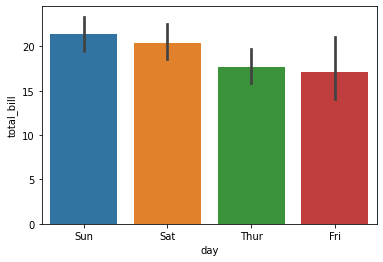

In [4]:
sns.barplot(x="day", y="total_bill", data=tips)

## 課題１：時間帯とチップの関係を図示しなさい

<AxesSubplot:xlabel='time', ylabel='tip'>

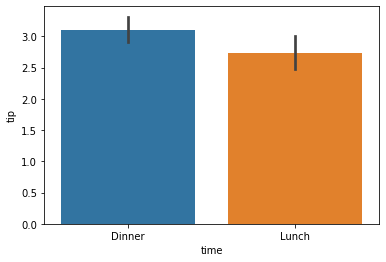

In [5]:
sns.barplot(x="time", y="tip", data=tips)

In [6]:
titanic = sns.load_dataset("titanic") # データセットを読み込み

In [7]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 例題２−１：各船室等級の人数を図示

<AxesSubplot:xlabel='class', ylabel='count'>

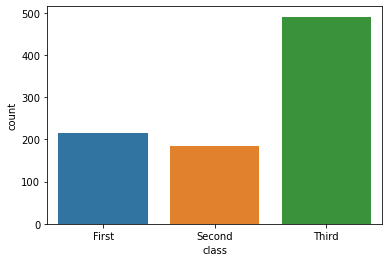

In [8]:
sns.countplot(x="class", data=titanic)

## 課題２−１：男女子供の数を図示

<AxesSubplot:xlabel='who', ylabel='count'>

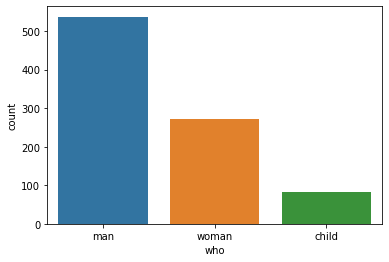

In [9]:
sns.countplot(x="who", data=titanic)

## 例題２ー２：２つのカテゴリ（class, whoで分類）

<AxesSubplot:xlabel='class', ylabel='count'>

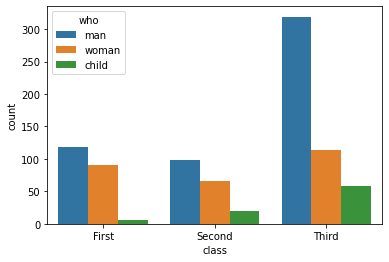

In [10]:
sns.countplot(x="class", hue="who", data=titanic)

## 課題２−２：任意の２カテゴリで分類

<AxesSubplot:xlabel='alive', ylabel='count'>

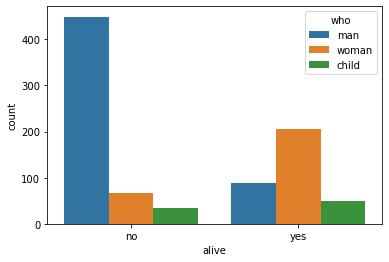

In [11]:
sns.countplot(x="alive", hue="who", data=titanic)

## 例題３：axを用いて複数のsnsを図示

<AxesSubplot:xlabel='class', ylabel='count'>

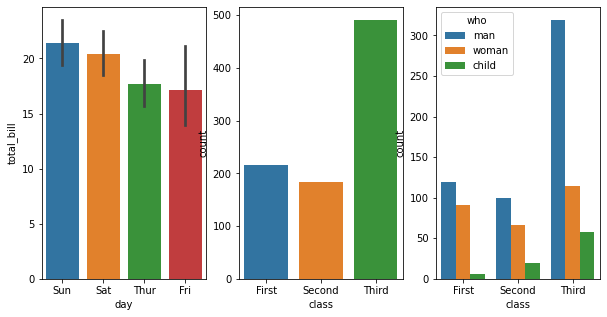

In [12]:
fig, ax = plt.subplots(1,3, figsize=(10,5))
sns.barplot(x="day", y="total_bill", data=tips, ax =ax[0])
sns.countplot(x="class", data=titanic, ax =ax[1])
sns.countplot(x="class", hue="who", data=titanic, ax =ax[2])

## 課題３：ax, snsを用いてタイタニックの死因を図示してください。
男性の方が死亡率が高い傾向にある。高齢者の方が生き残る傾向にある。などの関係を図示してください。

<AxesSubplot:xlabel='alive', ylabel='count'>

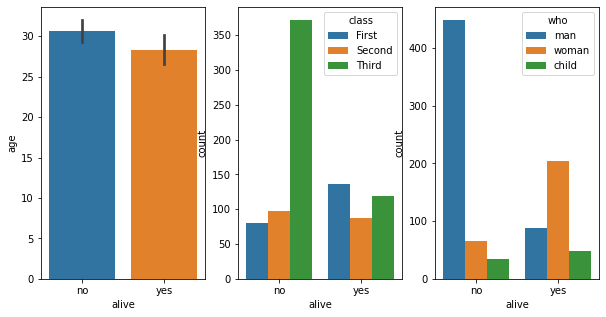

In [13]:
fig, ax = plt.subplots(1,3, figsize=(10,5))
sns.barplot(x="alive", y="age", data=titanic, ax =ax[0])
sns.countplot(x="alive", hue="class", data=titanic, ax =ax[1])
sns.countplot(x="alive", hue="who", data=titanic, ax =ax[2])

### 結論：生存者は若い。等級が高いほど生き残っている。女性の方が生き残っている。

## 例題４：曜日とチップの関係の箱ヒゲ図をかけ

<AxesSubplot:xlabel='day', ylabel='tip'>

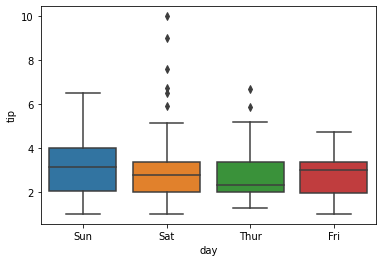

In [14]:
sns.boxplot(x='day',y='tip',data=tips)

## 課題４：時間帯と支払い総額の関係の箱ヒゲ図をかけ

<AxesSubplot:xlabel='time', ylabel='total_bill'>

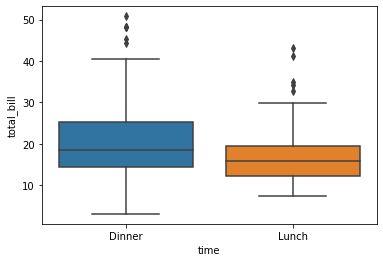

In [15]:
sns.boxplot(x='time',y='total_bill',data=tips)

## その他便利機能

色々一気に見れる

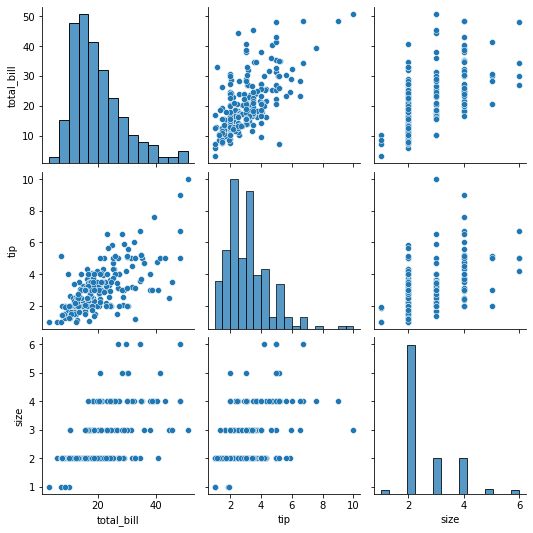

In [16]:
sns.pairplot(data=tips)

各データの相関関係が見れる

In [17]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


表にカラーをつけれる

In [18]:
tips.corr().style.background_gradient('summer_r')

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


スケールバーをつけれる

<AxesSubplot:>

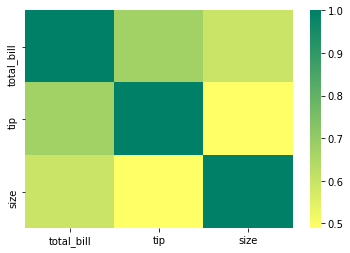

In [19]:
sns.heatmap(tips.corr(), cmap='summer_r')

## 課題５：タイタニックのデータセットをもとに自分の好きな用にデータ分析してみる。
なぜ死んだのか？どういう乗客が多いのか？など結論とその根拠となるデータ、グラフをわかりやすく見せる。
https://seaborn.pydata.org/examples/ 